**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5044 - Operaciones de aprendizaje automático (MLOps)**

**Tecnológico de Monterrey**

Dr. Gerardo Rodríguez Hernández

Prof. José Ángel Martínez Navarro

**Semana 5**
Fase 1 | Avance de Proyecto

**Equipo 18**
- Ali Mateo Campos Martínez      A01796071
- Mario Fonseca Martínez         A01795228
- Miguel Ángel Hernández Núñez   A01795751
- Jonatan Israel Meza Mendoza    A01275322
- Eder Mauricio Castillo Galindo A01795453

---

In [3]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# Cargar dataset modificado
df = pd.read_csv("../data/raw/turkish_music_emotion_modified.csv")

# Revisar primeras filas
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,mixed_type_col
0,relax,0.052,NaN,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.97,979
1,relax,0.125,0.439,6.680,142.24,4.058,0.516,0.785,0.397,0.556,...,1.000,0.0,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,943
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.746,0.016,1.0,0.413,28.105999999999998,0.134,1.682,0.692,0.963,628
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,1.000,0.161,0.757,error,0.265,0.042,0.354,0.743,0.968,192
4,relax,0.066,0.591,9.769,88.89,3.217,0.228,0.814,0.096,0.434,...,0.404,1.0,0.001,0.345,0.261,0.089,0.748,0.674,0.957,292


In [5]:
# Con el ánimo de comparar luego
# df_original = pd.read_csv("../data/raw/turkis_music_emotion_original.csv")

# **Parte 1**. Análisis descriptivo (univariante)

In [7]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

In [8]:
# Contar cuántas son object (texto/categorías)
num_object = df.select_dtypes(include="object")

# Contar cuántas son numéricas
num_numeric = df.select_dtypes(include="number")

print(f"Columnas tipo object: {num_object.shape[1]}")
print(f"Columnas numéricas: {num_numeric.shape[1]}")

Columnas tipo object: 38
Columnas numéricas: 14


In [9]:
# Porcentaje (%) de valores faltantes por columna
df.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

mixed_type_col                                    9.313725
_MFCC_Mean_11                                     2.696078
_MFCC_Mean_3                                      2.696078
_MFCC_Mean_5                                      1.960784
_Spectralcentroid_Mean                            1.960784
_MFCC_Mean_12                                     1.960784
_HarmonicChangeDetectionFunction_Mean             1.960784
_Pulseclarity_Mean                                1.715686
_RMSenergy_Mean                                   1.715686
_Tempo_Mean                                       1.715686
_HarmonicChangeDetectionFunction_Slope            1.715686
_MFCC_Mean_4                                      1.470588
_MFCC_Mean_1                                      1.470588
_MFCC_Mean_10                                     1.470588
_Spectralskewness_Mean                            1.470588
_AttackTime_Slope                                 1.470588
_Chromagram_Mean_7                                1.4705

## Análisis de variables numéricas

In [11]:
# Estadística descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
_Lowenergy_Mean,404.0,4.241829,50.714118,0.302,0.52300,0.5535,0.58500,805.528
_Fluctuation_Mean,405.0,9.711723,32.204572,3.987,5.85200,6.7450,7.83800,483.105
_MFCC_Mean_1,402.0,6.270055,37.120651,0.423,1.95875,2.4200,2.90000,565.490
_MFCC_Mean_2,403.0,7.599908,77.807229,-43.608,-0.26700,0.0650,0.41350,946.483
_MFCC_Mean_13,406.0,1.004042,19.712898,-0.620,-0.04400,0.0390,0.10500,397.220
_AttackTime_Slope,402.0,4.055219,49.192974,-0.465,-0.09300,0.0100,0.08975,732.036
_Eventdensity_Mean,405.0,8.865998,67.375263,0.234,1.73700,2.7730,3.74200,998.241
_Pulseclarity_Mean,401.0,4.355584,49.896492,0.011,0.13000,0.2180,0.33100,794.363
_Spectralcentroid_Mean,400.0,4625.624853,21765.211883,606.524,1983.39500,2547.6780,3179.98675,318051.072
_Chromagram_Mean_3,405.0,2.682472,45.699208,0.000,0.08300,0.2990,0.59500,920.000


In [12]:
# Forma (asimetría)
df.skew(numeric_only=True).sort_values(ascending=False)
# Todas las variables numéricas tienen sesgo positivo, es decir su promedio es mayor que la moda.

_MFCC_Mean_13                                  20.147970
_Chromagram_Mean_3                             20.118656
_Chromagram_Mean_10                            20.045608
_Lowenergy_Mean                                14.444717
_Chromagram_Mean_9                             14.111677
_Pulseclarity_Mean                             13.526342
_Fluctuation_Mean                              13.223509
_AttackTime_Slope                              12.887338
_Eventdensity_Mean                             12.461290
_MFCC_Mean_1                                   12.268594
_Spectralcentroid_Mean                         11.943330
_HarmonicChangeDetectionFunction_PeriodFreq    11.703957
_MFCC_Mean_2                                   10.380621
_Chromagram_Mean_6                              1.134205
dtype: float64

In [13]:
# Forma (curtosis)
df.kurt(numeric_only=True).sort_values(ascending=False)

_MFCC_Mean_13                                  405.960372
_Chromagram_Mean_3                             404.839071
_Chromagram_Mean_10                            402.209418
_Lowenergy_Mean                                211.045891
_Chromagram_Mean_9                             198.469578
_Pulseclarity_Mean                             192.842101
_Fluctuation_Mean                              180.148383
_AttackTime_Slope                              171.826077
_Eventdensity_Mean                             164.068311
_MFCC_Mean_1                                   163.872334
_Spectralcentroid_Mean                         150.161041
_HarmonicChangeDetectionFunction_PeriodFreq    143.717906
_MFCC_Mean_2                                   109.020740
_Chromagram_Mean_6                               0.253010
dtype: float64

In [93]:
def plot_numeric_eda(df: pd.DataFrame, bins: int = 20) -> None:
    """
    Genera histogramas y boxplots para todas las columnas numéricas del DataFrame.
    - Detecta automáticamente las columnas numéricas.
    - Muestra en pantalla ambas visualizaciones.

    Parámetros:
        df (pd.DataFrame): DataFrame a analizar
        bins (int): número de intervalos para los histogramas
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()

    if not numeric_cols:
        print("No se encontraron columnas numéricas en el DataFrame!")
        return

    #print(f"Columnas numéricas detectadas ({len(numeric_cols)}): {numeric_cols}\n")

    # --- Histogramas ---
    print("Distribución de variables numéricas (Histogramas)")
    df[numeric_cols].hist(
        figsize=(15, 10),
        bins=bins,
        color="skyblue",
        edgecolor="black"
    )
    plt.suptitle("Distribución de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # --- Boxplots ---
    print("\nDispersión y posibles outliers (Boxplots)")
    df[numeric_cols].plot(
        kind="box",
        subplots=True,
        layout=(max(1, len(numeric_cols) // 3 + 1), 3),
        figsize=(15, 16),
        sharex=False,
        sharey=False,
        vert=False,
        color=dict(boxes="blue", whiskers="black", medians="red", caps="gray")
    )
    plt.suptitle("Boxplots de variables numéricas", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Distribución de variables numéricas (Histogramas)


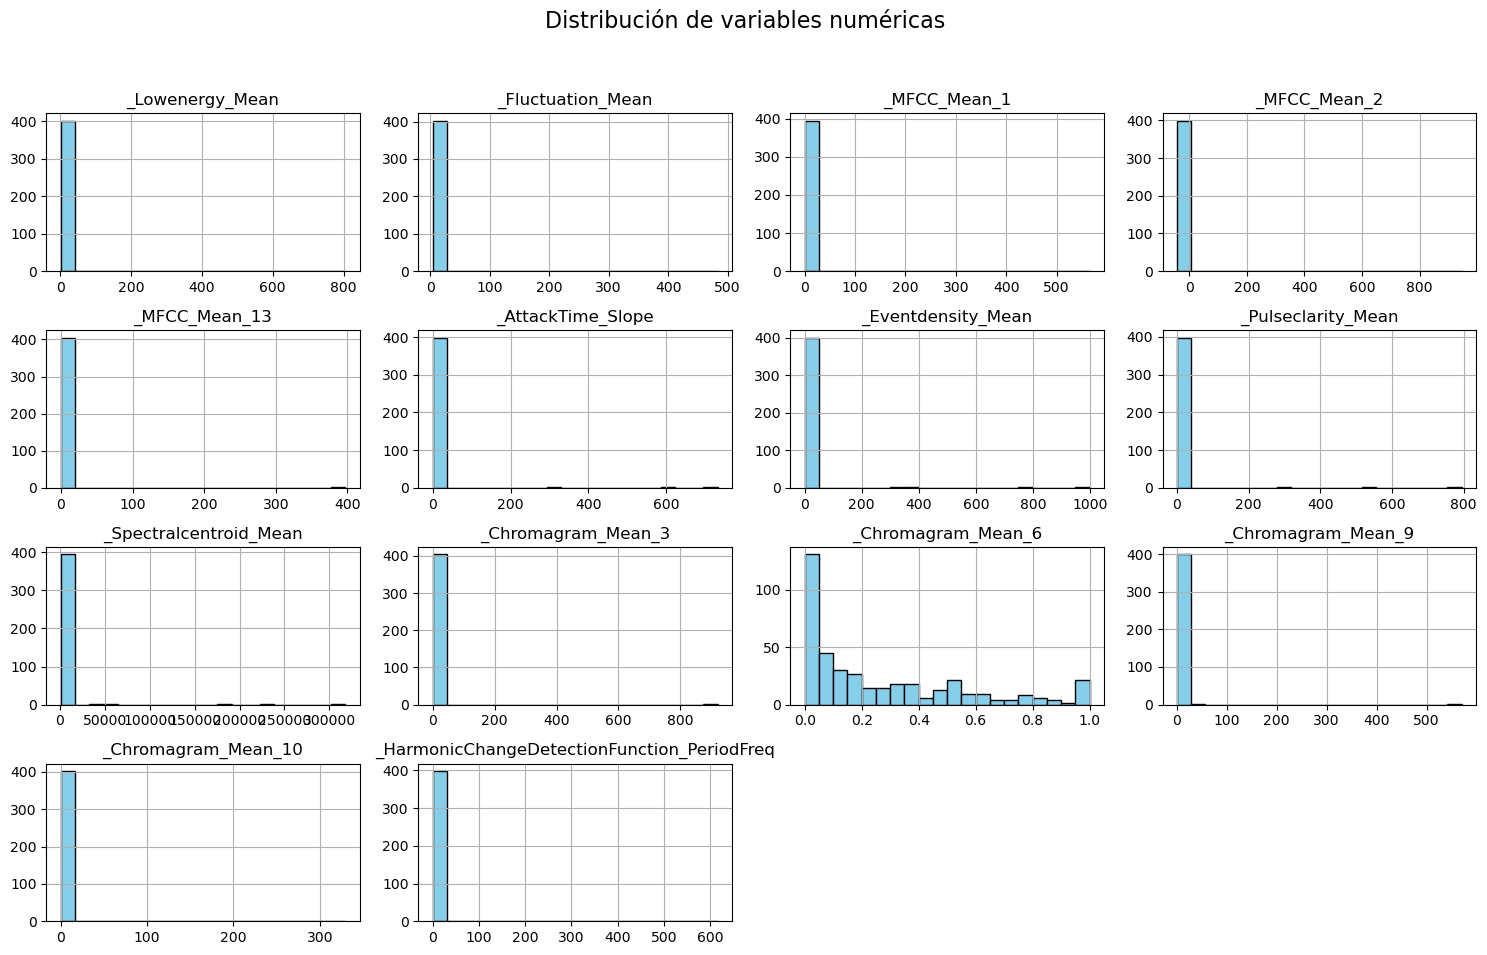


Dispersión y posibles outliers (Boxplots)


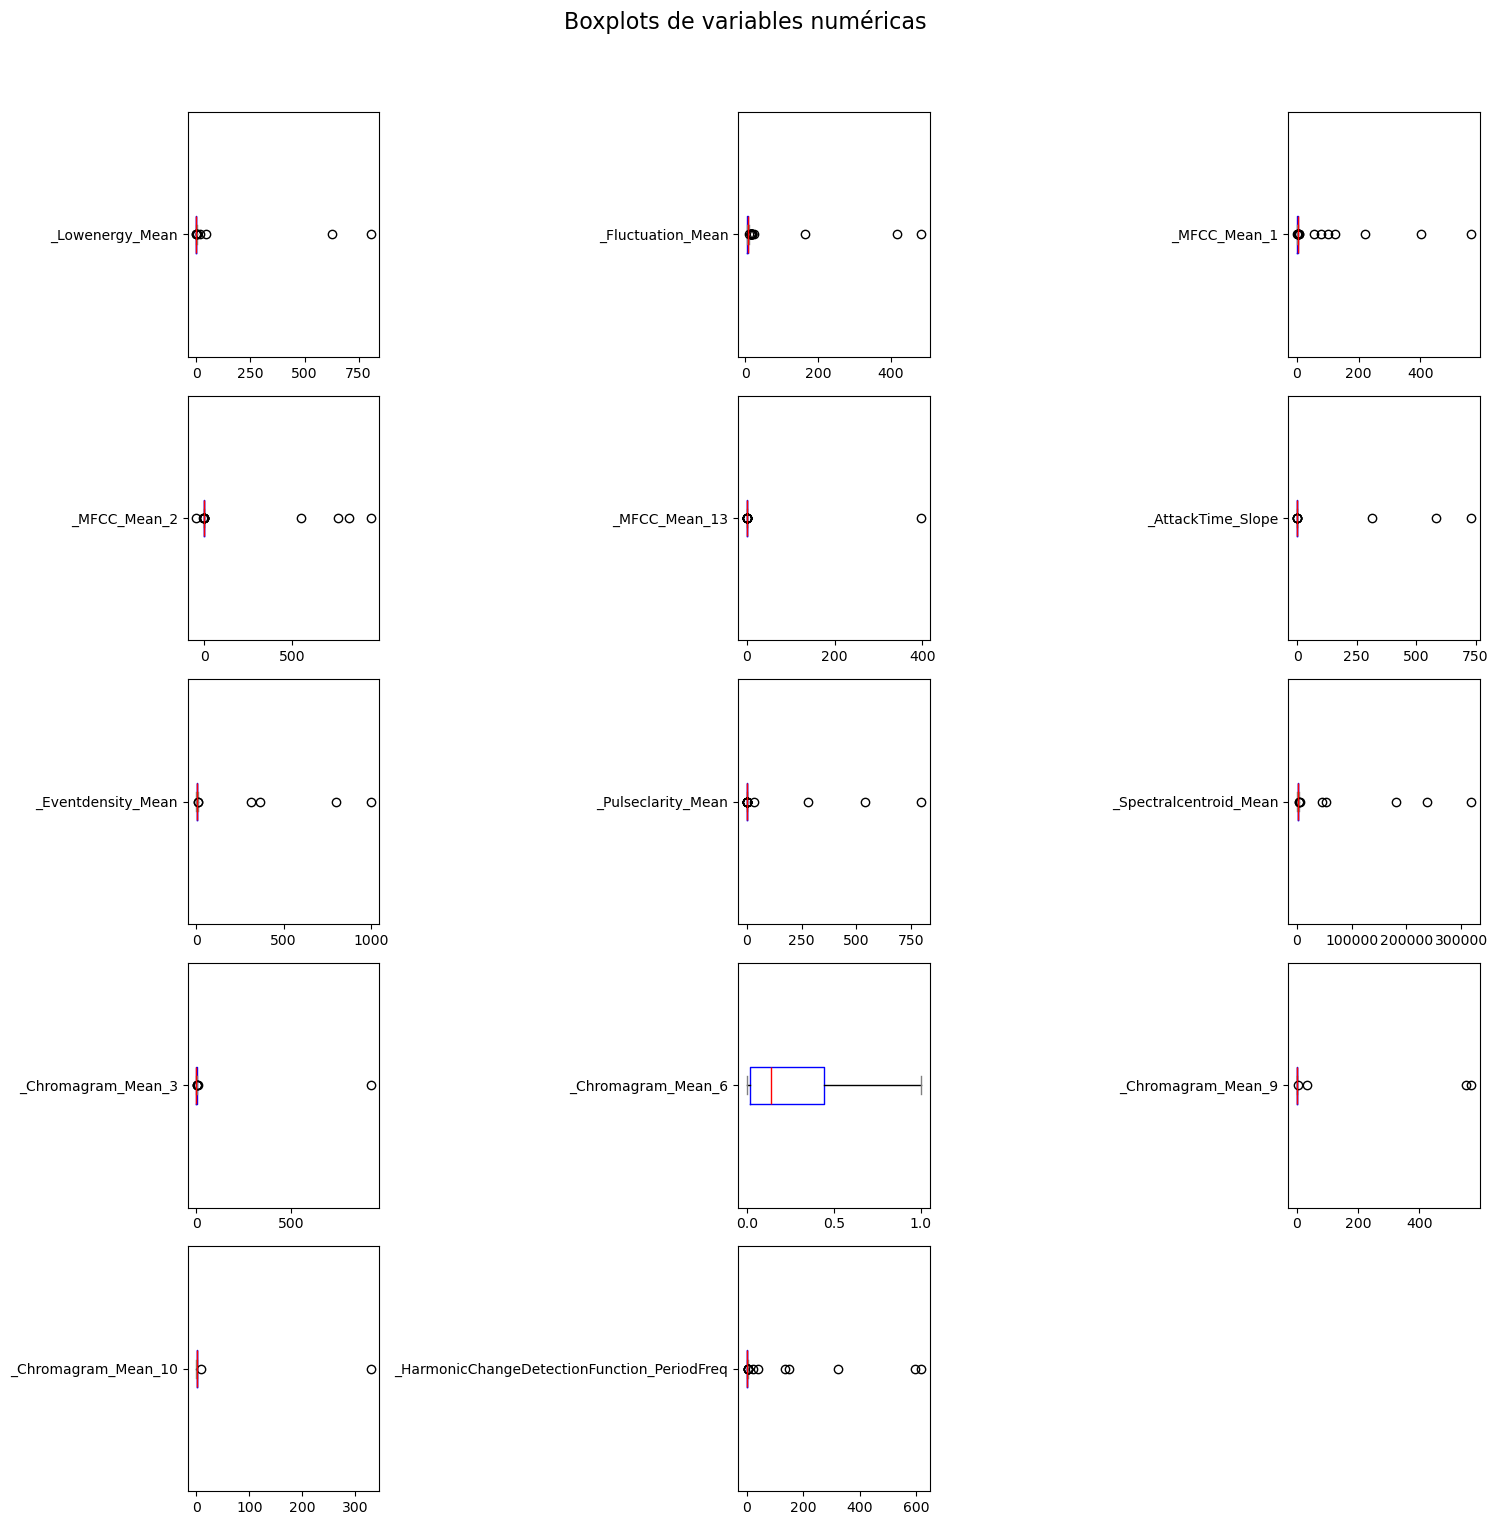

In [95]:
# Gráficas
plot_numeric_eda(df)

- Los histogramas anteriores sugieren que existen varios valores atípicos en diferentes columnas.

## Análisis de variables categóricas

In [18]:
# Descripción estadística
df.describe(include='O').T

,count,unique,top,freq
Class,403,8,relax,100
_RMSenergy_Mean,401,211,0.06,6
_Tempo_Mean,401,384,150.255,3
_MFCC_Mean_3,397,320,0.259,5
_MFCC_Mean_4,402,328,0.123,5
_MFCC_Mean_5,400,301,0.124,4
_MFCC_Mean_6,404,305,0.138,5
_MFCC_Mean_7,405,310,0.073,5
_MFCC_Mean_8,405,285,0.037,6
_MFCC_Mean_9,405,286,-0.018,5


- No sólo el nombre de las columnas sino adicionalmente la moda de la tabla anterior sugiere que son realmente valores numéricos. mixed_type_col y Class son las únicas que sugieren ser tipo string. A continuación revisamos el detalle:

In [20]:
# Recuentos únicos (número de ocurrencias para cada valor único)
cat_cols = ["Class", "mixed_type_col"]

for col in cat_cols:
    #print("\nNúmero de ocurrencias para cada valor:")
    print(df[col].value_counts(dropna=False))
    print("\n")

Class
relax      100
sad         99
happy       98
angry       93
NaN          5
 HAPPY       4
 ANGRY       4
 SAD         3
 RELAX       2
Name: count, dtype: int64


mixed_type_col
bad        42
unknown    39
NaN        38
987         3
979         2
           ..
376         1
206         1
373         1
448         1
136         1
Name: count, Length: 258, dtype: int64




In [21]:
def plot_counts(df: pd.DataFrame, col: str, ascending: bool = False, horizontal: bool = False) -> None:
    """
    Grafica el conteo de valores únicos en una columna categórica.
    
    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        col (str): Nombre de la columna a graficar.
        ascending (bool): Si True, ordena por frecuencia ascendente.
        horizontal (bool): Si True, muestra el gráfico de barras horizontal.
    """
    # Contar valores
    counts = df[col].value_counts(ascending=ascending, dropna=False)

    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 5))
    
    if horizontal:
        counts.plot(kind="barh", color="skyblue", edgecolor="black", ax=ax)
        ax.set_xlabel("Conteo")
        ax.set_ylabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, (value, count) in enumerate(counts.items()):
            ax.text(count + 0.5, i, str(count), va="center", fontsize=10)
    else:
        counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
        ax.set_ylabel("Conteo")
        ax.set_xlabel(col)
        ax.set_title(f"Distribución de {col}")
        for i, count in enumerate(counts):
            ax.text(i, count + 0.5, str(count), ha="center", va="bottom", fontsize=10)
    
    plt.tight_layout()
    plt.show()

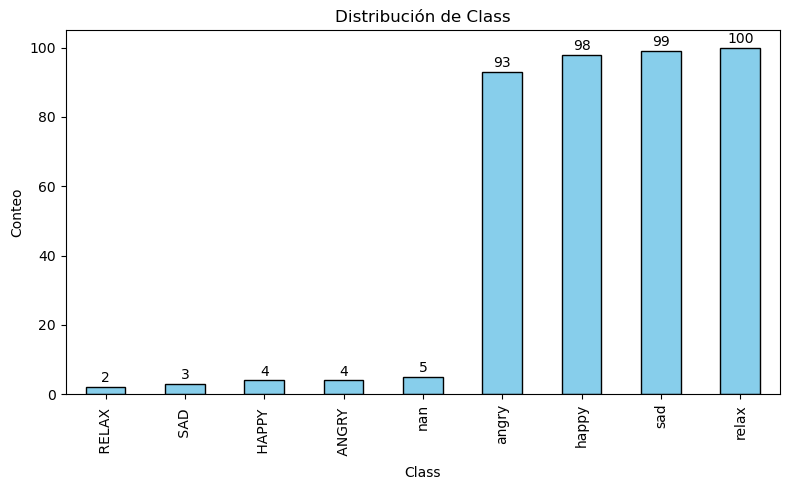

In [22]:
plot_counts(df, "Class", ascending=True)

* "mixed_type_col" también parece ser un numérica, sólo que se requiere cambiar "bad" y "unknown" por nulos inicialmente.
* La columna "Class" sólo requiere remover espacios al inicio y final de cada cadena y luego estandarizar así:
    * relax = RELAX
    * sad = SAD
    * happy = HAPPY
    * angry = ANGRY
* La columna "Class" y "mixed_type_col" también tiene valores faltantes.
* De esa manera la única categórica sería nuestra variable a predecir "Class". Por lo tanto creamos una función para convertirlas a numéricas las que faltan:

In [24]:
def clean_object_columns_to_numeric(
    df: pd.DataFrame,
    target_col: str = "Class"
) -> tuple[pd.DataFrame, dict]:
    """
    Limpia columnas tipo object en un DataFrame:
    - Quita espacios al inicio y final.
    - Elimina espacios internos.
    - Reemplaza comas por puntos (ej: "0,56" -> "0.56").
    - Convierte a numérico con errors='coerce' (valores no numéricos -> NaN).
    - Excluye la columna objetivo (por defecto 'Class').
    - Genera un reporte con los valores no convertibles por columna.

    Retorna:
        df_clean: DataFrame limpio.
        non_numeric_report: dict {columna: [valores no convertibles]}
    """
    df_clean = df.copy()
    non_numeric_report = {}

    for col in df_clean.select_dtypes(include="object").columns:
        if col == target_col:
            continue  # excluir la variable objetivo

        # Guardar versión original para comparación
        original_values = df_clean[col].copy()

        # Limpieza general
        df_clean[col] = (
            df_clean[col]
            .astype(str)
            .str.strip()           # eliminar espacios extremos
            .str.replace(" ", "", regex=False)  # eliminar espacios internos
            .str.replace(",", ".", regex=False)  # cambiar coma por punto
        )

        # Convertir a número
        df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

        # Detectar valores que se volvieron NaN
        mask_nan = df_clean[col].isna()
        invalid_values = original_values[mask_nan].dropna().unique()

        if len(invalid_values) > 0:
            non_numeric_report[col] = invalid_values.tolist()

    return df_clean, non_numeric_report

In [25]:
df_clean, report = clean_object_columns_to_numeric(df, target_col="Class")

In [26]:
print("\n Reporte de valores no convertibles:\n")
for col, vals in report.items():
    print(f" - {col}: {vals}")


 Reporte de valores no convertibles:

 - _RMSenergy_Mean: ['error']
 - _Tempo_Mean: ['error', 'invalid']
 - _MFCC_Mean_3: ['?']
 - _MFCC_Mean_4: ['invalid', 'error']
 - _MFCC_Mean_5: ['invalid']
 - _MFCC_Mean_6: ['?']
 - _MFCC_Mean_7: ['error']
 - _MFCC_Mean_8: ['invalid']
 - _MFCC_Mean_9: ['?']
 - _MFCC_Mean_10: ['error']
 - _MFCC_Mean_11: [' NAN ']
 - _MFCC_Mean_12: ['?', 'error']
 - _Roughness_Mean: ['invalid']
 - _Roughness_Slope: ['error']
 - _Zero-crossingrate_Mean: ['error']
 - _AttackTime_Mean: ['?']
 - _Rolloff_Mean: [' ERROR ', ' NAN ', ' INVALID ']
 - _Brightness_Mean: ['invalid', '?']
 - _Spectralspread_Mean: ['error']
 - _Spectralskewness_Mean: ['error', 'invalid', '?']
 - _Spectralkurtosis_Mean: ['invalid', 'error']
 - _Spectralflatness_Mean: ['invalid', 'error']
 - _EntropyofSpectrum_Mean: ['invalid', '?']
 - _Chromagram_Mean_1: ['invalid', ' NAN ']
 - _Chromagram_Mean_2: ['error']
 - _Chromagram_Mean_4: ['?']
 - _Chromagram_Mean_5: ['error', '?']
 - _Chromagram_Mean_7:

- Teniendo en cuenta los resultados anteriores sobre la columna objetivo, es evidente que se tienen solamente 4 clases, por lo que procedemos a realizar una función para procesar la variable objetivo:

In [28]:
def normalize_target_column(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """
    Normaliza la columna de clases:
    - Convierte a string
    - Strip: elimina espacios al inicio y al final
    - Convierte a minúsculas
    - Reemplaza valores no válidos por NaN
    """
    df_clean = df.copy()
    
    df_clean[col] = (
        df_clean[col]
        .astype(str)             # asegurar string
        .str.strip()             # quitar espacios extremos
        .str.lower()             # pasar a minúsculas
    )
    
    # Reemplazar valores "nan" de texto (que aparecen al convertir) por np.nan
    df_clean[col] = df_clean[col].replace("nan", pd.NA)
    
    # Mantener solo las clases válidas
    valid_classes = {"happy", "sad", "angry", "relax"}
    df_clean.loc[~df_clean[col].isin(valid_classes), col] = pd.NA
    
    return df_clean

In [29]:
df_clean = normalize_target_column(df_clean, "Class")

In [30]:
df_clean["Class"].value_counts(dropna=False)

Class
relax    102
happy    102
sad      102
angry     97
<NA>       5
Name: count, dtype: int64

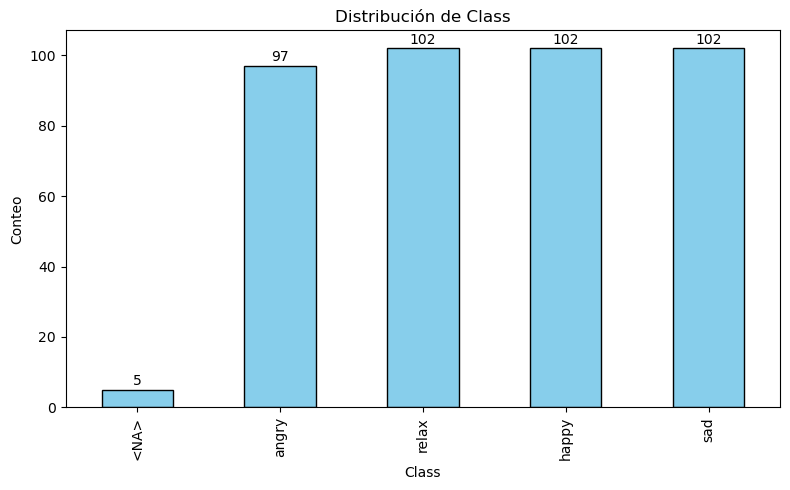

In [31]:
plot_counts(df_clean, "Class", ascending=True)

In [32]:
df_clean.describe(include='O').T

,count,unique,top,freq
Class,403,4,relax,102


In [33]:
df_clean.isna().sum().mul(100).div(len(df)).sort_values(ascending=False)

mixed_type_col                                    29.166667
_MFCC_Mean_3                                       2.941176
_MFCC_Mean_11                                      2.941176
_MFCC_Mean_12                                      2.696078
_RMSenergy_Mean                                    2.450980
_MFCC_Mean_5                                       2.205882
_Tempo_Mean                                        2.205882
_HarmonicChangeDetectionFunction_Mean              2.205882
_Spectralskewness_Mean                             2.205882
_MFCC_Mean_4                                       1.960784
_Spectralcentroid_Mean                             1.960784
_MFCC_Mean_10                                      1.960784
_HarmonicChangeDetectionFunction_Slope             1.960784
_HarmonicChangeDetectionFunction_PeriodEntropy     1.960784
_Chromagram_Mean_5                                 1.960784
_Chromagram_Mean_11                                1.715686
_Chromagram_Mean_1                      

- En la práctica de feature engineering, 25% se usa como umbral operativo para eliminar una columna con esa cantidad de faltantes.
- Necesario revisar importancia de la columna "mixed_type_col" antes de eliminarla, pues tiene casi el 30% de faltantes.
- Evaluar su correlación con el target (Class). Si no aporta información predictiva significativa, entonces se puede eliminar. NOTA: POR AHORA SE ELIMINA.

Algunas referencias:

- “When more than 20–30% of data in a variable are missing, imputation becomes unreliable, and analysts should consider excluding that variable unless the missingness mechanism is well understood.” (Little, R. J. A., & Rubin, D. B. (2002). Statistical Analysis with Missing Data. Wiley.)
- “High rates of missingness (above 40%) often yield unstable imputations, and dropping the variable may be preferable unless domain knowledge dictates otherwise.” (Van Buuren, S. (2018). Flexible Imputation of Missing Data. CRC Press.)
- “Variables with more than 25% missing values are often removed unless they have strong theoretical justification.” (Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.)

In [35]:
df_clean = df_clean.drop(columns=["mixed_type_col"])

n_duplicates = df_clean.duplicated().sum()

if n_duplicates > 0:
    print(f"Se encontraron {n_duplicates} filas duplicadas. Serán eliminadas.")
    df_clean = df_clean.drop_duplicates()
    print(f"Después de eliminar, el DataFrame tiene {len(df_clean)} filas.")
else:
    print("No se encontraron filas duplicadas.")

Se encontraron 2 filas duplicadas. Serán eliminadas.
Después de eliminar, el DataFrame tiene 406 filas.


In [36]:
df_clean.describe(include='O').T

,count,unique,top,freq
Class,401,4,relax,102


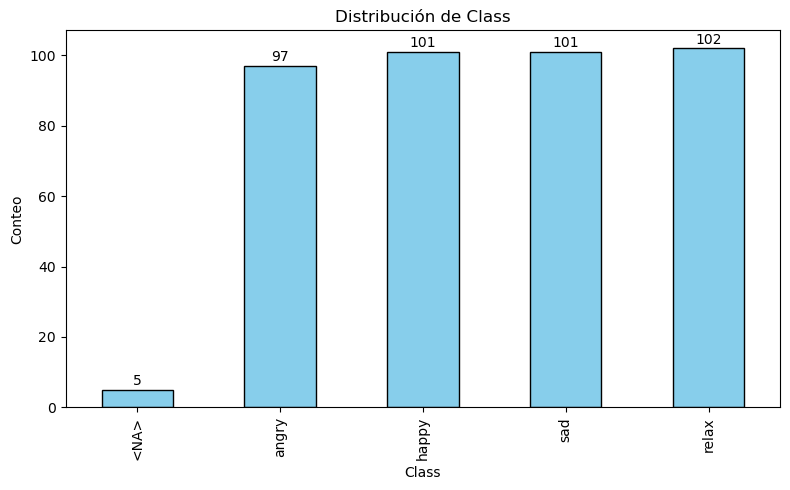

In [37]:
plot_counts(df_clean, "Class", ascending=True)

In [38]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,396.0,3.343808,47.939827,0.010,0.08500,0.1295,0.18050,873.096
_Lowenergy_Mean,402.0,4.260057,50.839768,0.302,0.52300,0.5535,0.58475,805.528
_Fluctuation_Mean,403.0,9.726161,32.283842,3.987,5.85700,6.7450,7.83300,483.105
_Tempo_Mean,397.0,153.433418,605.957563,48.284,101.48200,119.0440,147.38800,12177.714
_MFCC_Mean_1,400.0,6.290585,37.212400,0.423,1.96025,2.4200,2.90225,565.490
_MFCC_Mean_2,401.0,7.637501,77.999671,-43.608,-0.26500,0.0650,0.42000,946.483
_MFCC_Mean_3,394.0,9.078990,75.217259,-0.870,0.28800,0.4920,0.69550,721.726
_MFCC_Mean_4,398.0,2.517902,49.878282,-11.560,-0.11900,0.0475,0.20400,994.982
_MFCC_Mean_5,397.0,5.708723,54.995452,-0.494,0.06200,0.1910,0.30000,683.085
_MFCC_Mean_6,401.0,0.036788,0.206118,-0.916,-0.07900,0.0500,0.15300,0.799


In [120]:
def replace_outliers_iqr(df: pd.DataFrame, factor: float = 1.5) -> pd.DataFrame:
    """
    Detecta outliers en columnas numéricas usando el método IQR
    y los reemplaza por NaN.

    Parámetros:
        df (pd.DataFrame): DataFrame de entrada.
        factor (float): multiplicador del IQR (1.5 por defecto, 3.0 si quieres ser más tolerante).

    Retorna:
        DataFrame con outliers reemplazados por NaN.
    """
    df_out = df.copy()
    numeric_cols = df_out.select_dtypes(include=["number"]).columns.tolist()

    for col in numeric_cols:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Identificar y reemplazar outliers
        mask_outliers = (df_out[col] < lower_bound) | (df_out[col] > upper_bound)
        n_outliers = mask_outliers.sum()

        if n_outliers > 0:
            print(f"- '{col}': {n_outliers} outliers reemplazados por NaN")
            df_out.loc[mask_outliers, col] = np.nan

    return df_out

In [122]:
df_no_outliers = replace_outliers_iqr(df_clean)

- '_RMSenergy_Mean': 6 outliers reemplazados por NaN
- '_Lowenergy_Mean': 8 outliers reemplazados por NaN
- '_Fluctuation_Mean': 16 outliers reemplazados por NaN
- '_Tempo_Mean': 1 outliers reemplazados por NaN
- '_MFCC_Mean_1': 21 outliers reemplazados por NaN
- '_MFCC_Mean_2': 12 outliers reemplazados por NaN
- '_MFCC_Mean_3': 11 outliers reemplazados por NaN
- '_MFCC_Mean_4': 14 outliers reemplazados por NaN
- '_MFCC_Mean_5': 13 outliers reemplazados por NaN
- '_MFCC_Mean_6': 16 outliers reemplazados por NaN
- '_MFCC_Mean_7': 12 outliers reemplazados por NaN
- '_MFCC_Mean_8': 14 outliers reemplazados por NaN
- '_MFCC_Mean_9': 14 outliers reemplazados por NaN
- '_MFCC_Mean_10': 13 outliers reemplazados por NaN
- '_MFCC_Mean_11': 15 outliers reemplazados por NaN
- '_MFCC_Mean_12': 13 outliers reemplazados por NaN
- '_MFCC_Mean_13': 15 outliers reemplazados por NaN
- '_Roughness_Mean': 17 outliers reemplazados por NaN
- '_Roughness_Slope': 13 outliers reemplazados por NaN
- '_Zero-cros

Distribución de variables numéricas (Histogramas)


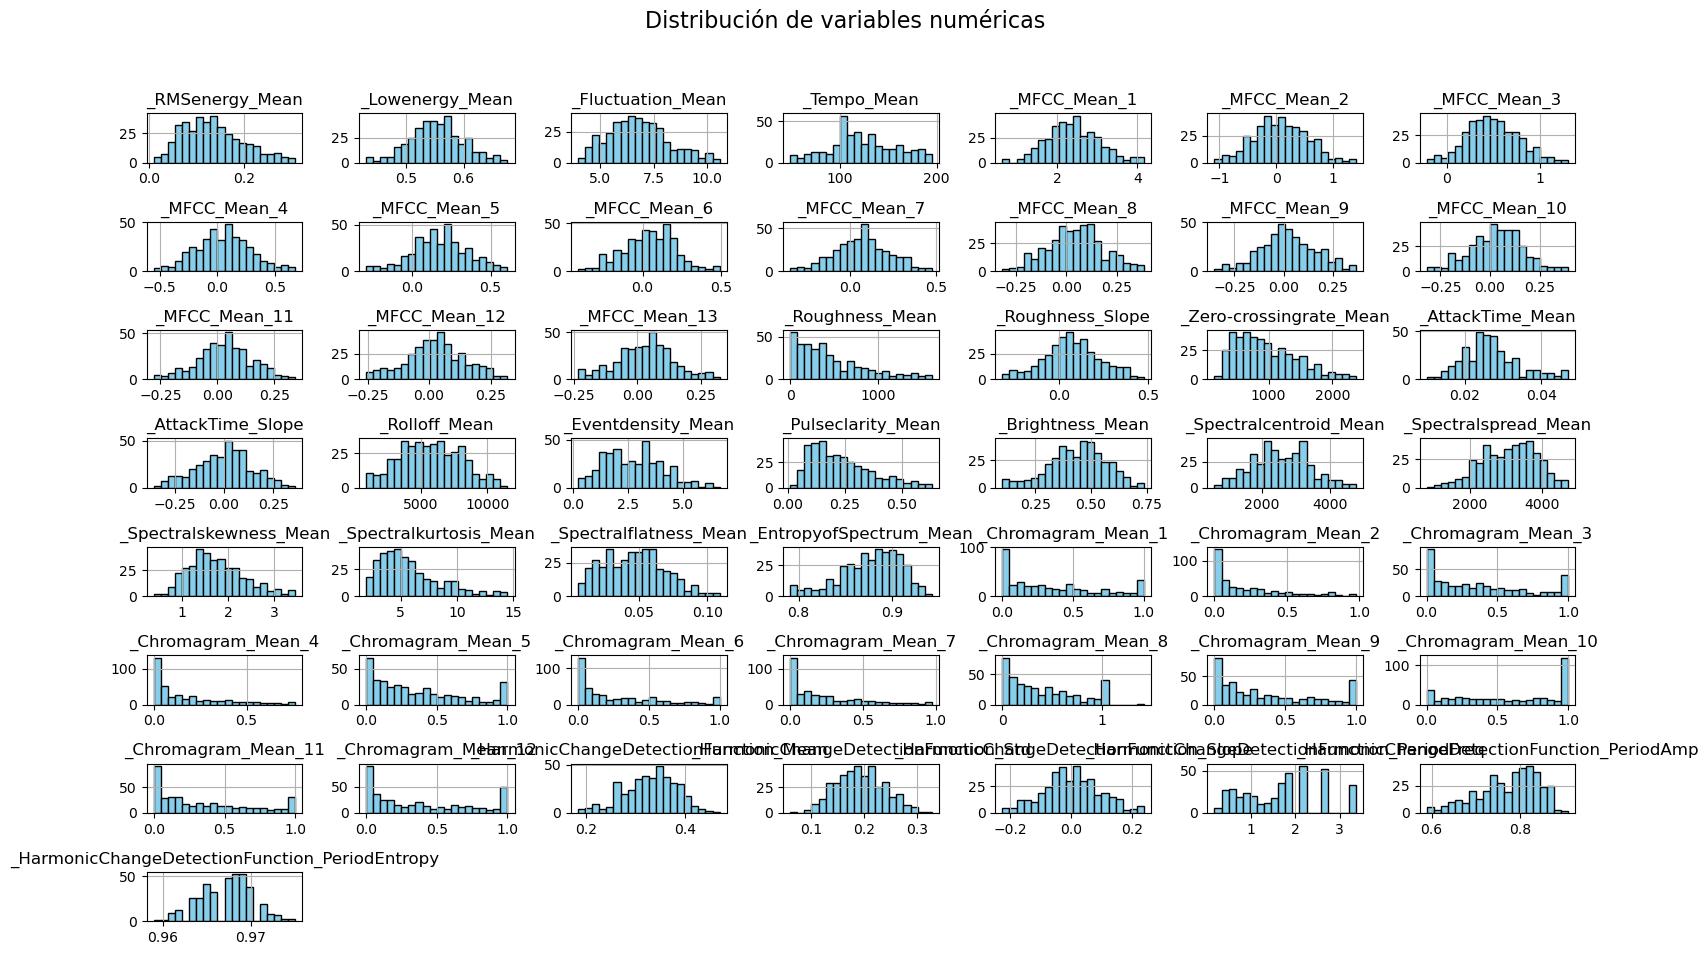


Dispersión y posibles outliers (Boxplots)


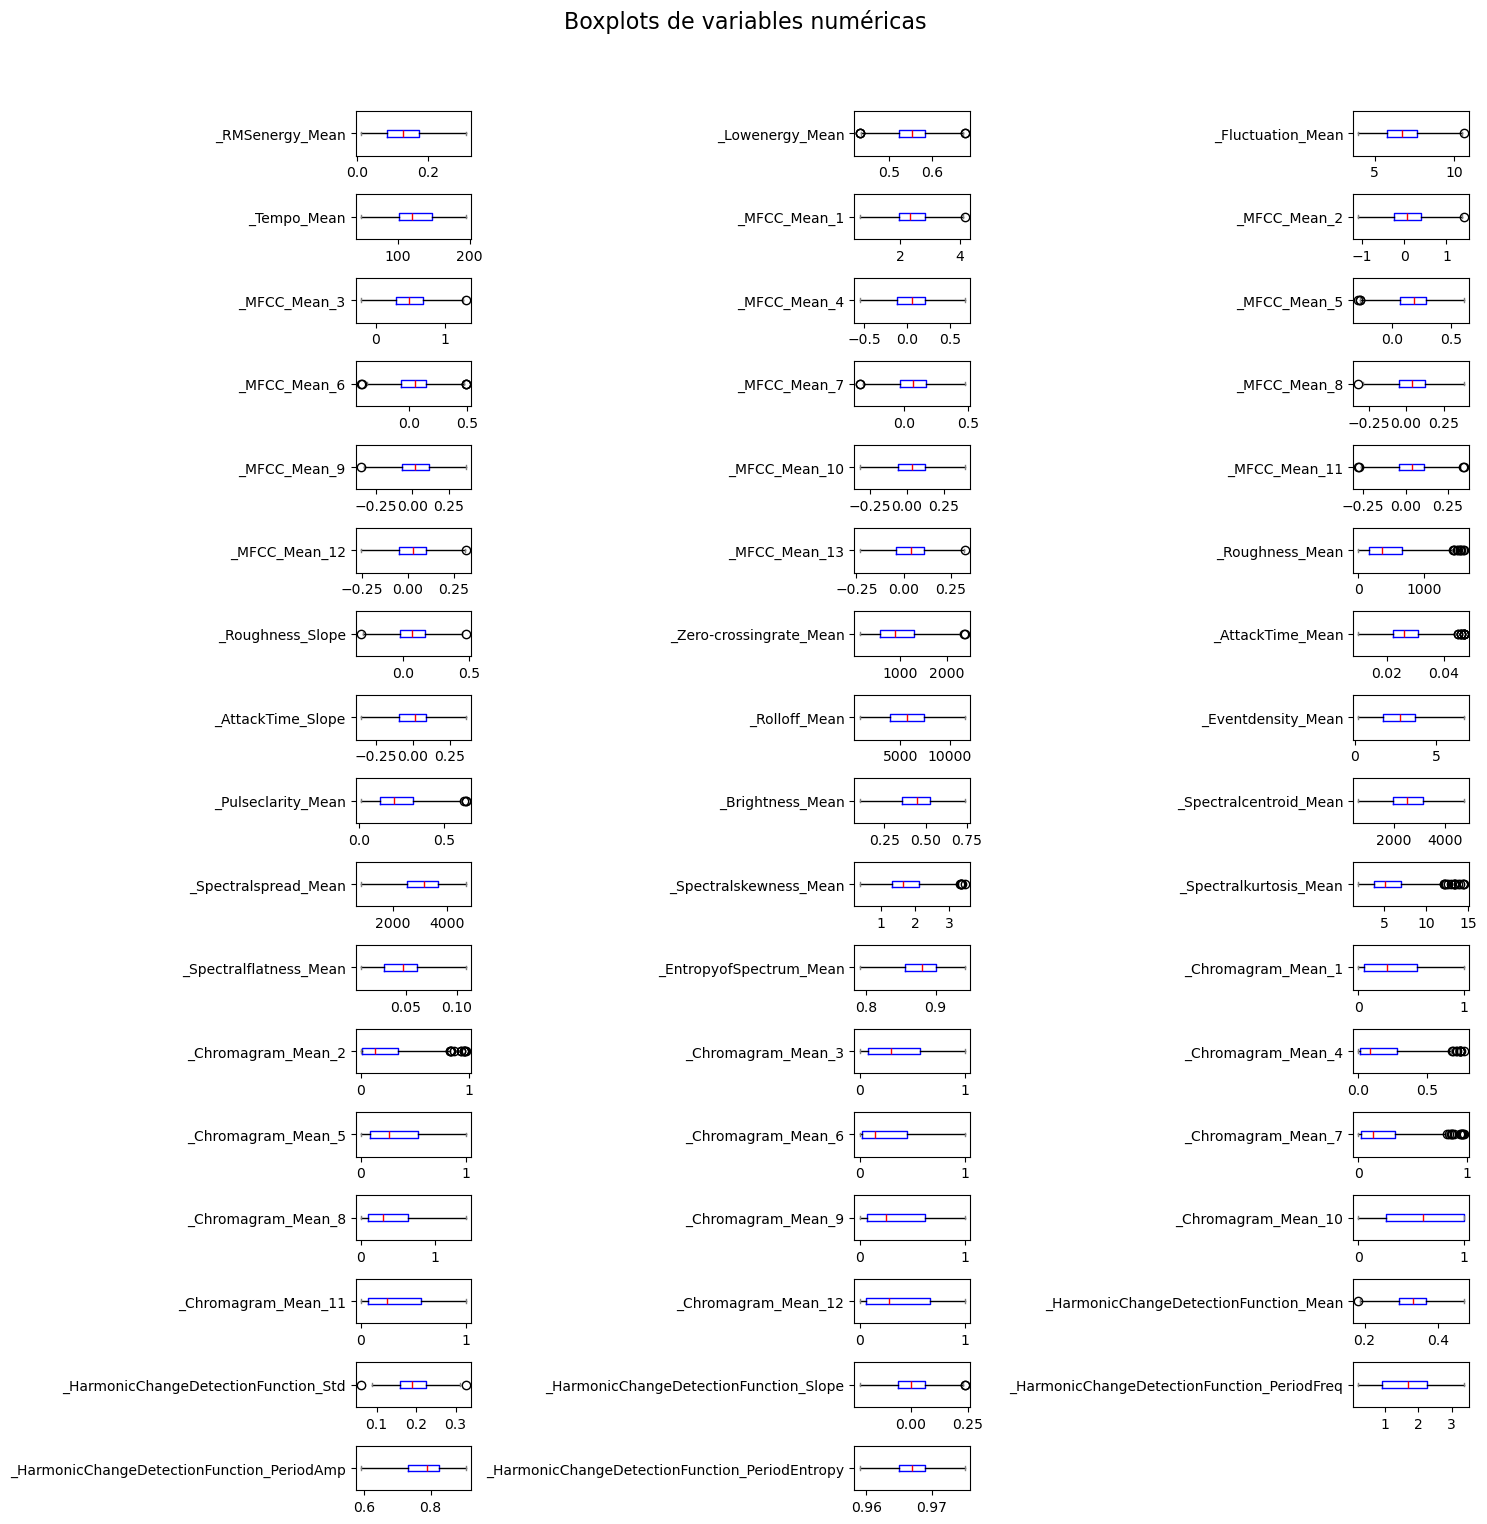

In [107]:
# Supongamos que df_clean ya contiene tus datos limpios
plot_numeric_eda(df_no_outliers, bins=20)

In [98]:
df_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,390.0,0.135123,0.063400,0.010,0.08500,0.1285,0.17550,0.309
_Lowenergy_Mean,394.0,0.553850,0.047140,0.431,0.52300,0.5525,0.58275,0.676
_Fluctuation_Mean,387.0,6.815982,1.396794,3.987,5.80700,6.6900,7.67350,10.578
_Tempo_Mean,396.0,123.069073,34.001338,48.284,101.44675,119.0390,147.07375,195.026
_MFCC_Mean_1,379.0,2.386926,0.658915,0.634,1.94100,2.3390,2.82800,4.165
_MFCC_Mean_2,389.0,0.072517,0.467239,-1.088,-0.25300,0.0600,0.39700,1.411
_MFCC_Mean_3,383.0,0.490191,0.278126,-0.218,0.28350,0.4790,0.67700,1.301
_MFCC_Mean_4,384.0,0.049758,0.232755,-0.550,-0.11225,0.0550,0.20500,0.675
_MFCC_Mean_5,384.0,0.179570,0.177076,-0.290,0.06275,0.1840,0.28725,0.607
_MFCC_Mean_6,385.0,0.041514,0.163866,-0.411,-0.07000,0.0510,0.15000,0.491


In [101]:
# Forma (asimetría)
df_no_outliers.skew(numeric_only=True).sort_values(ascending=False)

_Chromagram_Mean_7                                1.282429
_Chromagram_Mean_4                                1.249497
_Chromagram_Mean_2                                1.196483
_Chromagram_Mean_6                                1.128713
_Spectralkurtosis_Mean                            1.103663
_Roughness_Mean                                   1.062575
_Pulseclarity_Mean                                0.834984
_Chromagram_Mean_5                                0.779629
_Chromagram_Mean_9                                0.741284
_Chromagram_Mean_11                               0.728202
_Zero-crossingrate_Mean                           0.699542
_Chromagram_Mean_1                                0.685321
_Chromagram_Mean_3                                0.668025
_AttackTime_Mean                                  0.666438
_Chromagram_Mean_8                                0.603778
_Spectralskewness_Mean                            0.564256
_Chromagram_Mean_12                               0.5576

- Las 5 primeras presentan cola derecha larga, incluso después de eliminar outliers, lo que sugiere distribuciones sesgadas hacia valores bajos y pocos valores altos.
- Considerar transformaciones logarítmicas o Box–Cox teniendo en cuenta que tienen valores positivos. Esto estabiliza la varianza y reduce la asimetría.

In [103]:
# Forma (curtosis)
df_no_outliers.kurt(numeric_only=True).sort_values(ascending=False)

_Chromagram_Mean_7                                0.948055
_Spectralkurtosis_Mean                            0.788524
_Chromagram_Mean_4                                0.628347
_Chromagram_Mean_2                                0.469237
_AttackTime_Mean                                  0.393347
_Roughness_Mean                                   0.380506
_Chromagram_Mean_6                                0.236092
_Pulseclarity_Mean                               -0.015213
_Lowenergy_Mean                                  -0.022793
_MFCC_Mean_1                                     -0.026688
_MFCC_Mean_10                                    -0.029973
_MFCC_Mean_13                                    -0.039364
_MFCC_Mean_6                                     -0.041501
_MFCC_Mean_5                                     -0.041564
_Spectralskewness_Mean                           -0.061011
_MFCC_Mean_11                                    -0.066872
_MFCC_Mean_4                                     -0.0743

- Casi todas las variables están entre -0.4 y +0.9, lo cual indica distribuciones relativamente planas o normales. Muy pocas con curtosis positiva significativa (_Chromagram_Mean_7 = 0.95, _Spectralkurtosis_Mean = 0.79).
- Esto confirma que la eliminación de outliers fue efectiva, ya que las colas extremas (que elevan la curtosis) se redujeron.

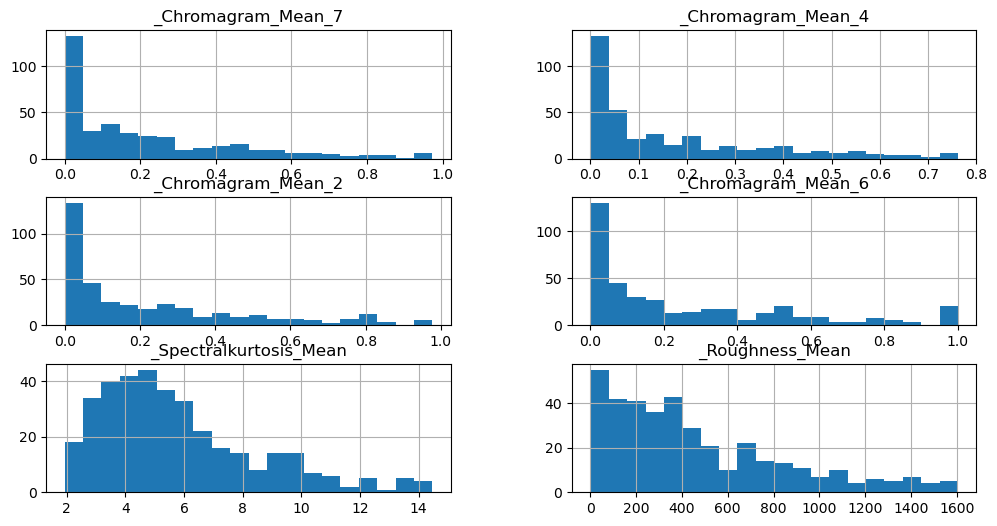

In [124]:
cols_skewed = df_no_outliers.skew(numeric_only=True).sort_values(ascending=False).head(6).index
df_no_outliers[cols_skewed].hist(figsize=(12,6), bins=20)
plt.show()

Teniendo en cuenta los gráficos anteriores, evaluar transformaciones:
- np.log1p() (todos los valores son positivos)